In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load and prepare data
df = pd.read_csv("cleaned_consumption_dataset.csv")

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful features
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()

# Check data
df.head() 

,Timestamp,Consumer,Consumption,Date,Hour,Weekday
0,2025-06-01,Consumer 1,221.67,2025-06-01,0,Sunday
1,2025-06-01,Consumer 2,1.22,2025-06-01,0,Sunday
2,2025-06-01,Consumer 3,25.70,2025-06-01,0,Sunday
3,2025-06-01,Consumer 4,80.34,2025-06-01,0,Sunday
4,2025-06-01,Consumer 5,135.91,2025-06-01,0,Sunday


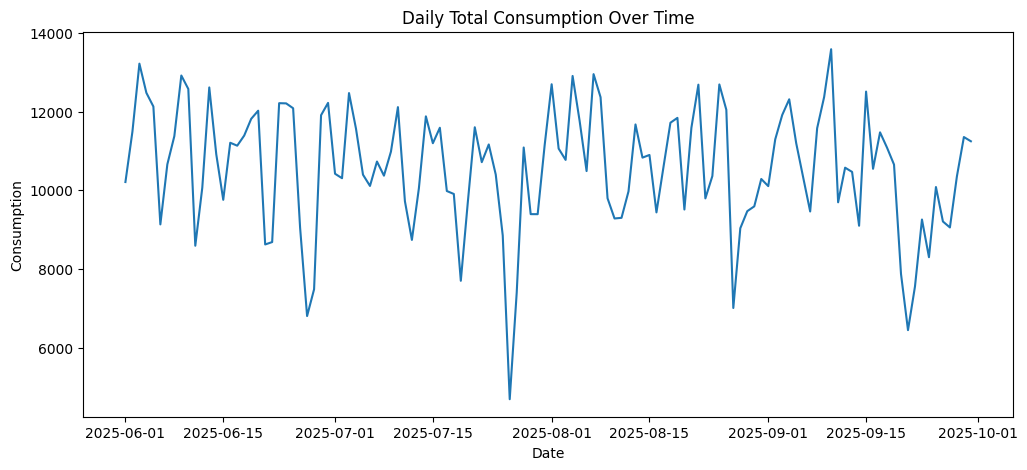

In [4]:
import matplotlib.pyplot as plt

daily = df.groupby('Date')['Consumption'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily['Date'], daily['Consumption'])
plt.title('Daily Total Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


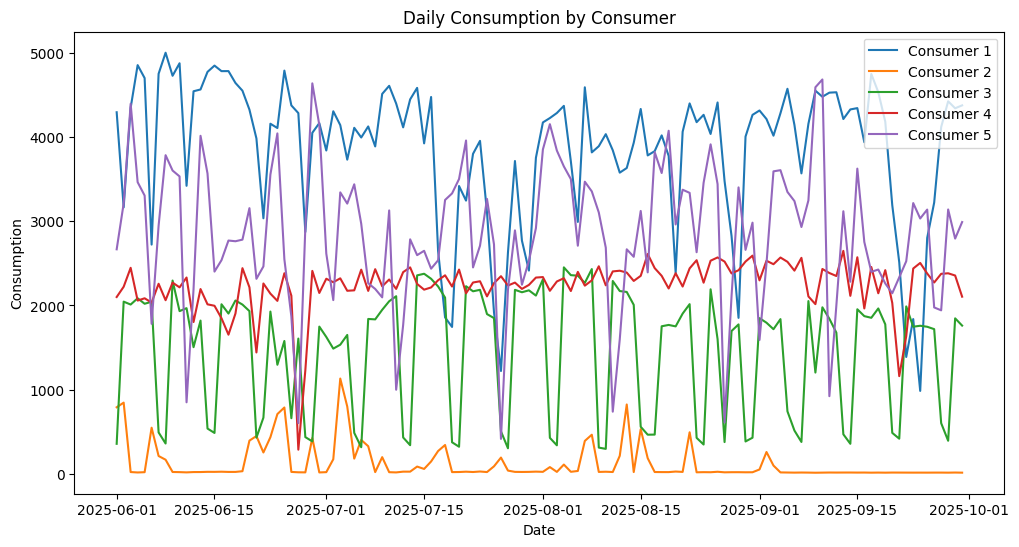

In [5]:
consumer_trends = df.groupby(['Date', 'Consumer'])['Consumption'].sum().reset_index()

plt.figure(figsize=(12,6))
for consumer in consumer_trends['Consumer'].unique():
    temp = consumer_trends[consumer_trends['Consumer'] == consumer]
    plt.plot(temp['Date'], temp['Consumption'], label=consumer)

plt.title('Daily Consumption by Consumer')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()


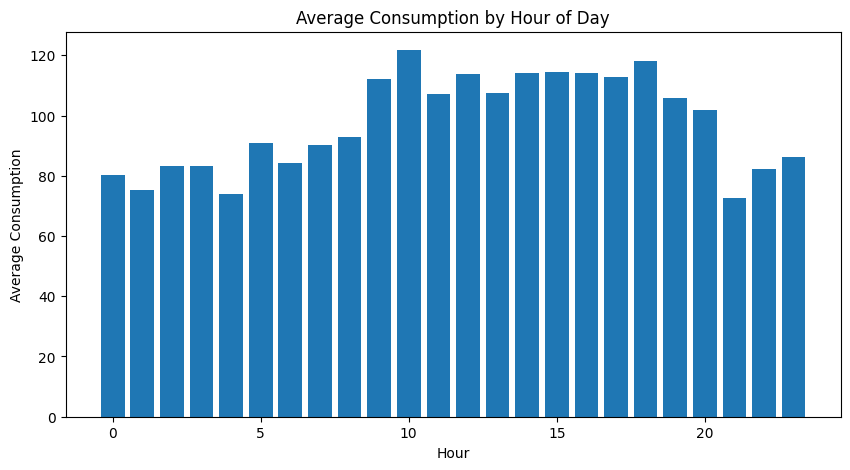

In [6]:
hourly_avg = df.groupby('Hour')['Consumption'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(hourly_avg['Hour'], hourly_avg['Consumption'])
plt.title('Average Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Consumption')
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv("cleaned_consumption_dataset.csv")

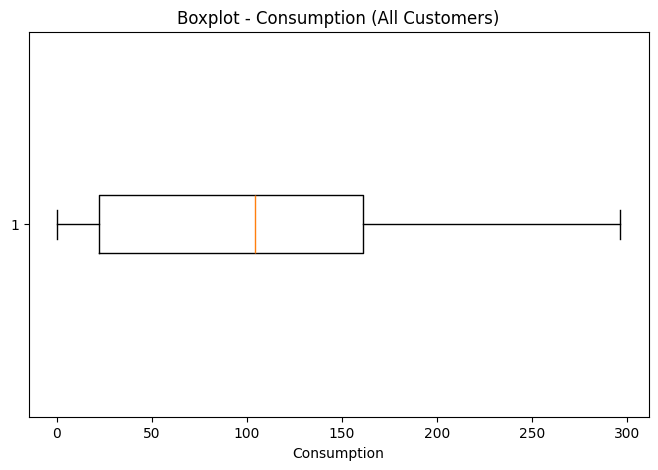

In [ ]:
# BOX PLOT (All Customers)
plt.figure(figsize=(8, 5))
plt.boxplot(df['Consumption'], vert=False)
plt.title('Boxplot - Consumption (All Customers)')
plt.xlabel('Consumption')
plt.show()

In [ ]:
# Z-SCORE METHOD 
z_scores = np.abs(stats.zscore(df['Consumption']))
z_threshold = 3
z_outliers = df[z_scores > z_threshold]

print(f"Z-score Outliers: {len(z_outliers)} ({len(z_outliers)/len(df)*100:.2f}%)")


Z-score Outliers: 0 (0.00%)


In [ ]:
# IQR METHOD 
Q1 = df['Consumption'].quantile(0.25)
Q3 = df['Consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Consumption'] < lower_bound) | (df['Consumption'] > upper_bound)]

print(f"IQR Outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(df)*100:.2f}%)")

IQR Outliers: 0 (0.00%)


In [ ]:
# Display samples
print("\nSample Z-score Outliers:")
print(z_outliers.head())

print("\nSample IQR Outliers:")
print(iqr_outliers.head())


Sample Z-score Outliers:
Empty DataFrame
Columns: [Timestamp, Consumer, Consumption]
Index: []

Sample IQR Outliers:
Empty DataFrame
Columns: [Timestamp, Consumer, Consumption]
Index: []
